# Credit Risk Resampling Techniques

In [246]:
import warnings
warnings.filterwarnings('ignore')

In [247]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# Read the CSV and Perform Basic Data Cleaning

In [248]:
columns = [
    "loan_amnt", "int_rate", "installment", "home_ownership",
    "annual_inc", "verification_status", "issue_d", "loan_status",
    "pymnt_plan", "dti", "delinq_2yrs", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "total_acc",
    "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d",
    "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_act_il",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
    "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc",
    "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl",
    "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy",
    "bc_util", "chargeoff_within_12_mths", "delinq_amnt", "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc",
    "mths_since_recent_bc", "mths_since_recent_inq", "num_accts_ever_120_pd", "num_actv_bc_tl",
    "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl",
    "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies",
    "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "total_il_high_credit_limit", "hardship_flag", "debt_settlement_flag"
]

target = ["loan_status"]

In [249]:
print(len(columns))

86


In [250]:
# Load the data
file_path = Path('./LoanStats_2019Q1.csv')
df = pd.read_csv(file_path, skiprows=1)[:-2]
#make a copy of the df. Sometimes this is easier for pandas to keep track of the df. ask [:,
loans_df = df.loc[:, columns].copy()

loans_df

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,20000.0,17.19%,499.10,RENT,47000.0,Source Verified,Mar-2019,Issued,n,14.02,...,98.0,12.5,0.0,0.0,75824.0,31546.0,33800.0,21524.0,N,N
1,21225.0,14.74%,502.05,MORTGAGE,225000.0,Not Verified,Mar-2019,Issued,n,16.80,...,100.0,50.0,1.0,0.0,747075.0,209426.0,53500.0,128175.0,N,N
2,5000.0,17.97%,180.69,MORTGAGE,62000.0,Not Verified,Mar-2019,Issued,n,19.82,...,66.7,50.0,0.0,0.0,255738.0,31615.0,9400.0,39938.0,N,N
3,20000.0,8.19%,628.49,MORTGAGE,200000.0,Not Verified,Mar-2019,Issued,n,22.66,...,95.7,22.2,0.0,0.0,448069.0,84744.0,49400.0,105180.0,N,N
4,12000.0,15.57%,289.09,MORTGAGE,49000.0,Source Verified,Mar-2019,Issued,n,13.47,...,86.1,14.3,0.0,0.0,189260.0,106025.0,24400.0,68860.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115670,5000.0,13.56%,169.83,MORTGAGE,48000.0,Not Verified,Jan-2019,Current,n,8.28,...,90.5,NaN,0.0,0.0,88613.0,9182.0,0.0,11413.0,N,N
115671,6000.0,6.46%,183.79,MORTGAGE,96000.0,Not Verified,Jan-2019,Current,n,0.31,...,100.0,0.0,1.0,0.0,33500.0,50.0,14900.0,0.0,N,N
115672,16000.0,16.14%,563.62,MORTGAGE,32000.0,Source Verified,Jan-2019,Current,n,20.89,...,93.3,37.5,1.0,0.0,34200.0,17066.0,16400.0,0.0,N,N
115673,16000.0,11.31%,350.36,MORTGAGE,72000.0,Verified,Jan-2019,Current,n,7.02,...,94.3,0.0,1.0,0.0,251486.0,74835.0,23000.0,63090.0,N,N


In [251]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Data columns (total 86 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   115675 non-null  float64
 1   int_rate                    115675 non-null  object 
 2   installment                 115675 non-null  float64
 3   home_ownership              115675 non-null  object 
 4   annual_inc                  115675 non-null  float64
 5   verification_status         115675 non-null  object 
 6   issue_d                     115675 non-null  object 
 7   loan_status                 115675 non-null  object 
 8   pymnt_plan                  115675 non-null  object 
 9   dti                         115418 non-null  float64
 10  delinq_2yrs                 115675 non-null  float64
 11  inq_last_6mths              115675 non-null  float64
 12  open_acc                    115675 non-null  float64
 13  pub_rec       

In [252]:
# Drop the null columns where all values are null
loans_df = loans_df.dropna(axis='columns', how='all')
loans_df


,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,20000.0,17.19%,499.10,RENT,47000.0,Source Verified,Mar-2019,Issued,n,14.02,...,98.0,12.5,0.0,0.0,75824.0,31546.0,33800.0,21524.0,N,N
1,21225.0,14.74%,502.05,MORTGAGE,225000.0,Not Verified,Mar-2019,Issued,n,16.80,...,100.0,50.0,1.0,0.0,747075.0,209426.0,53500.0,128175.0,N,N
2,5000.0,17.97%,180.69,MORTGAGE,62000.0,Not Verified,Mar-2019,Issued,n,19.82,...,66.7,50.0,0.0,0.0,255738.0,31615.0,9400.0,39938.0,N,N
3,20000.0,8.19%,628.49,MORTGAGE,200000.0,Not Verified,Mar-2019,Issued,n,22.66,...,95.7,22.2,0.0,0.0,448069.0,84744.0,49400.0,105180.0,N,N
4,12000.0,15.57%,289.09,MORTGAGE,49000.0,Source Verified,Mar-2019,Issued,n,13.47,...,86.1,14.3,0.0,0.0,189260.0,106025.0,24400.0,68860.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115670,5000.0,13.56%,169.83,MORTGAGE,48000.0,Not Verified,Jan-2019,Current,n,8.28,...,90.5,NaN,0.0,0.0,88613.0,9182.0,0.0,11413.0,N,N
115671,6000.0,6.46%,183.79,MORTGAGE,96000.0,Not Verified,Jan-2019,Current,n,0.31,...,100.0,0.0,1.0,0.0,33500.0,50.0,14900.0,0.0,N,N
115672,16000.0,16.14%,563.62,MORTGAGE,32000.0,Source Verified,Jan-2019,Current,n,20.89,...,93.3,37.5,1.0,0.0,34200.0,17066.0,16400.0,0.0,N,N
115673,16000.0,11.31%,350.36,MORTGAGE,72000.0,Verified,Jan-2019,Current,n,7.02,...,94.3,0.0,1.0,0.0,251486.0,74835.0,23000.0,63090.0,N,N


In [253]:
# Drop the null rows. If there's an NA in any row it will drop the whole row
loans_df = loans_df.dropna()
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82537 entries, 0 to 115673
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   82537 non-null  float64
 1   int_rate                    82537 non-null  object 
 2   installment                 82537 non-null  float64
 3   home_ownership              82537 non-null  object 
 4   annual_inc                  82537 non-null  float64
 5   verification_status         82537 non-null  object 
 6   issue_d                     82537 non-null  object 
 7   loan_status                 82537 non-null  object 
 8   pymnt_plan                  82537 non-null  object 
 9   dti                         82537 non-null  float64
 10  delinq_2yrs                 82537 non-null  float64
 11  inq_last_6mths              82537 non-null  float64
 12  open_acc                    82537 non-null  float64
 13  pub_rec                     82

In [254]:
count = []
for index, row in loans_df.iterrows():
    count.append(index)
    
print(len(count))


82537


In [255]:
loans_df["loan_status"].value_counts()

Current               68470
Issued                13720
In Grace Period         171
Late (16-30 days)        89
Late (31-120 days)       87
Name: loan_status, dtype: int64

In [256]:
# Remove the `Issued` loan status. We're getting rid of this becuase this tells us no information wether a payment will be current of late
issued_mask = loans_df["loan_status"] != "Issued"
loans_df = loans_df.loc[issued_mask]

loans_df["loan_status"].value_counts()

Current               68470
In Grace Period         171
Late (16-30 days)        89
Late (31-120 days)       87
Name: loan_status, dtype: int64

In [257]:
# Convert the target column values to low_risk and high_risk based on their values
x = {'Current': 'low_risk'}   
loans_df = loans_df.replace(x)
loans_df["loan_status"].value_counts()

low_risk              68470
In Grace Period         171
Late (16-30 days)        89
Late (31-120 days)       87
Name: loan_status, dtype: int64

In [258]:
# This is replacing all other loan_status values to be equaled to "high_risk"
x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_risk')    
loans_df = loans_df.replace(x)

loans_df["loan_status"].value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [259]:
# convert interest rate to numerical
loans_df['int_rate'] = loans_df['int_rate'].str.replace('%', '')
loans_df['int_rate'] = loans_df['int_rate'].astype('float') / 100

loans_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
93,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
99,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
132,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
133,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
140,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [260]:
loans_df.reset_index(inplace=True, drop=True)

loans_df.head()
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68817 entries, 0 to 68816
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   68817 non-null  float64
 1   int_rate                    68817 non-null  float64
 2   installment                 68817 non-null  float64
 3   home_ownership              68817 non-null  object 
 4   annual_inc                  68817 non-null  float64
 5   verification_status         68817 non-null  object 
 6   issue_d                     68817 non-null  object 
 7   loan_status                 68817 non-null  object 
 8   pymnt_plan                  68817 non-null  object 
 9   dti                         68817 non-null  float64
 10  delinq_2yrs                 68817 non-null  float64
 11  inq_last_6mths              68817 non-null  float64
 12  open_acc                    68817 non-null  float64
 13  pub_rec                     688

### Create the training variables by converting the string values into numerical ones using the get_dummies() method.

In [261]:
#The include='objects' is the syntax to include dtypes specifically eqaul to a data type
columns_obj = loans_df.select_dtypes(include='object').columns
columns_obj

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'initial_list_status', 'next_pymnt_d', 'application_type',
       'hardship_flag', 'debt_settlement_flag'],
      dtype='object')

In [262]:
#examine all the columns to see if they actually have multiple different values to use get_dummies

In [263]:
#show which columns only have 1 input value
for column in loans_df[columns_obj]:
    print(column, "\n", loans_df[column].value_counts())
    print("-----------------------------")
    


home_ownership 
 MORTGAGE    36219
RENT        24613
OWN          7346
ANY           639
Name: home_ownership, dtype: int64
-----------------------------
verification_status 
 Not Verified       32895
Source Verified    25737
Verified           10185
Name: verification_status, dtype: int64
-----------------------------
issue_d 
 Jan-2019    31041
Feb-2019    25579
Mar-2019    12197
Name: issue_d, dtype: int64
-----------------------------
loan_status 
 low_risk     68470
high_risk      347
Name: loan_status, dtype: int64
-----------------------------
pymnt_plan 
 n    68817
Name: pymnt_plan, dtype: int64
-----------------------------
initial_list_status 
 w    60292
f     8525
Name: initial_list_status, dtype: int64
-----------------------------
next_pymnt_d 
 May-2019    42449
Apr-2019    26368
Name: next_pymnt_d, dtype: int64
-----------------------------
application_type 
 Individual    59206
Joint App      9611
Name: application_type, dtype: int64
-----------------------------
hard

In [264]:
#drop columns that only have 1 value
loans_df = loans_df.drop(columns=["debt_settlement_flag", "hardship_flag", "pymnt_plan"])
loans_df.shape
                         

(68817, 83)

In [265]:
#save and export clean_loans_df as a csv 
clean_loans_df = loans_df

clean_loans_df.to_csv("./clean_loans.csv", index=False)


In [266]:
#read in the new csv
df = pd.read_csv("./clean_loans.csv")
df

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,27.24,0.0,...,0.0,3.0,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,20.23,0.0,...,0.0,6.0,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,24.26,0.0,...,0.0,4.0,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,31.44,0.0,...,0.0,1.0,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,18.76,0.0,...,0.0,1.0,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68812,10000.0,0.1502,346.76,RENT,26000.0,Source Verified,Jan-2019,low_risk,9.60,0.0,...,0.0,3.0,80.0,0.0,0.0,0.0,20625.0,6798.0,11300.0,5425.0
68813,12000.0,0.2727,368.37,RENT,63000.0,Not Verified,Jan-2019,low_risk,29.07,0.0,...,0.0,5.0,96.2,0.0,0.0,0.0,87939.0,60350.0,13500.0,62939.0
68814,5000.0,0.1992,185.62,MORTGAGE,52000.0,Source Verified,Jan-2019,low_risk,14.86,0.0,...,0.0,3.0,100.0,0.0,1.0,0.0,30592.0,18611.0,3600.0,18492.0
68815,40000.0,0.0646,1225.24,MORTGAGE,520000.0,Verified,Jan-2019,low_risk,9.96,0.0,...,0.0,3.0,98.2,12.5,0.0,0.0,1033574.0,95958.0,100800.0,78634.0


# Split the Data into Training and Testing

In [267]:
# Create our features
X = df.drop(columns="loan_status")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68817 entries, 0 to 68816
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   68817 non-null  float64
 1   int_rate                    68817 non-null  float64
 2   installment                 68817 non-null  float64
 3   home_ownership              68817 non-null  object 
 4   annual_inc                  68817 non-null  float64
 5   verification_status         68817 non-null  object 
 6   issue_d                     68817 non-null  object 
 7   dti                         68817 non-null  float64
 8   delinq_2yrs                 68817 non-null  float64
 9   inq_last_6mths              68817 non-null  float64
 10  open_acc                    68817 non-null  float64
 11  pub_rec                     68817 non-null  float64
 12  revol_bal                   68817 non-null  float64
 13  total_acc                   688

In [268]:
# Create our target
y = df["loan_status"]
y.value_counts()

low_risk     68470
high_risk      347
Name: loan_status, dtype: int64

In [269]:
#This is our imbalanced problem
print(347/68470)

0.005067912954578648


In [270]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.0,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.052138,2.219423,95.057627,30.626217,0.125972,0.0,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.390633,1.897432,8.326426,33.631463,0.336732,0.0,1.928088e+05,5.738798e+04,26795.394232,5.095845e+04
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,3.600000e+03,2.350000e+02,100.000000,1.270000e+02
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,1.000000,93.000000,0.000000,0.000000,0.0,6.697700e+04,2.650300e+04,11600.000000,2.288000e+04
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,2.000000,100.000000,20.000000,0.000000,0.0,1.467100e+05,4.535700e+04,22100.000000,4.200000e+04
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,3.000000,100.000000,50.000000,0.000000,0.0,3.036400e+05,7.657000e+04,39300.000000,7.249900e+04
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,18.000000,19.000000,100.000000,100.000000,4.000000,0.0,3.292782e+06,1.295455e+06,509400.000000,1.426964e+06


In [271]:
X.shape

(68817, 82)

In [272]:
# Get X encoded
X_encoded = pd.get_dummies(X)
X_encoded.shape

(68817, 92)

In [273]:
X_encoded

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App
0,10500.0,0.1719,375.35,66000.0,27.24,0.0,0.0,8.0,0.0,1609.0,...,0,0,0,1,0,1,0,1,1,0
1,25000.0,0.2000,929.09,105000.0,20.23,0.0,0.0,17.0,1.0,18368.0,...,1,0,0,1,0,1,0,1,1,0
2,20000.0,0.2000,529.88,56000.0,24.26,0.0,0.0,8.0,0.0,13247.0,...,1,0,0,1,0,1,0,1,1,0
3,10000.0,0.1640,353.55,92000.0,31.44,0.0,1.0,10.0,1.0,17996.0,...,1,0,0,1,0,1,0,1,1,0
4,22000.0,0.1474,520.39,52000.0,18.76,0.0,1.0,14.0,0.0,9091.0,...,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68812,10000.0,0.1502,346.76,26000.0,9.60,0.0,0.0,9.0,0.0,2684.0,...,0,0,1,0,0,1,0,1,1,0
68813,12000.0,0.2727,368.37,63000.0,29.07,0.0,0.0,8.0,0.0,13314.0,...,0,0,1,0,0,1,0,1,1,0
68814,5000.0,0.1992,185.62,52000.0,14.86,0.0,0.0,5.0,1.0,3715.0,...,0,0,1,0,0,1,0,1,1,0
68815,40000.0,0.0646,1225.24,520000.0,9.96,0.0,1.0,21.0,0.0,59529.0,...,1,0,1,0,1,0,0,1,1,0


In [274]:
X.shape

(68817, 82)

In [275]:
y.shape

(68817,)

In [276]:
#standard scale your data. That way all data is around the same range. 
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()


In [277]:
#scale X encoded
X_encoded_scaled = data_scaler.fit_transform(X_encoded)
X_encoded_scaled

array([[-0.60109272,  0.91798436, -0.36555835, ...,  0.78814271,
         0.40290386, -0.40290386],
       [ 0.80978726,  1.50182932,  1.55674724, ...,  0.78814271,
         0.40290386, -0.40290386],
       [ 0.32327692,  1.50182932,  0.17089176, ...,  0.78814271,
         0.40290386, -0.40290386],
       ...,
       [-1.13625409,  1.4852074 , -1.02420508, ...,  0.78814271,
         0.40290386, -0.40290386],
       [ 2.26931827, -1.31143071,  2.58483046, ...,  0.78814271,
         0.40290386, -0.40290386],
       [-0.06593135, -0.30372679, -0.45231101, ...,  0.78814271,
         0.40290386, -0.40290386]])

In [278]:
# # Check the balance of our target values
# y['loan_status'].value_counts()

In [279]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, random_state=1)

In [280]:
y_train.value_counts()

low_risk     51366
high_risk      246
Name: loan_status, dtype: int64

### Get baseline of performance using logistic regression
- Use the LogisticRegression classifier to make predictions and evaluate the model’s performance.
- Calculate the accuracy score of the model.
- Generate a confusion matrix.
- Print out the imbalanced classification report.
- Pring out Balanced classification report
- -----------------------------------------------
- Model
- Fit
- Asses

### Instantiate a Logistic Regression Model

In [281]:
# MODEL

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [282]:
# FIT OUR MODEL WITH DATA (TRAINING)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [283]:
y_pred = classifier.predict(X_test)


In [284]:
#View data
predictions = classifier.predict(X_test)

pd.DataFrame({"Predictions": y_pred, "Actual": y_test})


,Predictions,Actual
7034,low_risk,low_risk
38804,low_risk,low_risk
65533,low_risk,low_risk
37736,low_risk,low_risk
6390,low_risk,low_risk
...,...,...
31854,low_risk,low_risk
27835,low_risk,low_risk
3089,low_risk,low_risk
43343,low_risk,low_risk


###  Validate the model, or evaluate its performance.

In [285]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.995059575704737

### Create a cunfusion Matrix

In [286]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions)
print(cm)

[[   21    80]
 [    5 17099]]


In [287]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

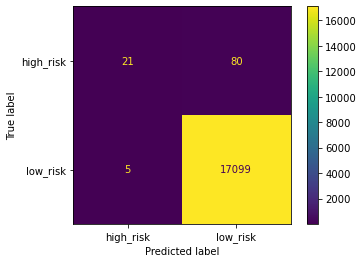

In [288]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()

In [289]:
#view classification report. SKlearn for classification report is for balanced report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

   high_risk       0.81      0.21      0.33       101
    low_risk       1.00      1.00      1.00     17104

    accuracy                           1.00     17205
   macro avg       0.90      0.60      0.66     17205
weighted avg       0.99      1.00      0.99     17205



In [290]:
# imbalanced-learn dependencies 
from imblearn.metrics import classification_report_imbalanced

In [291]:
# view the imballanced classification report 
report = classification_report_imbalanced(y_test, y_pred)
print(report)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.81      0.21      1.00      0.33      0.46      0.19       101
   low_risk       1.00      1.00      0.21      1.00      0.46      0.22     17104

avg / total       0.99      1.00      0.21      0.99      0.46      0.22     17205



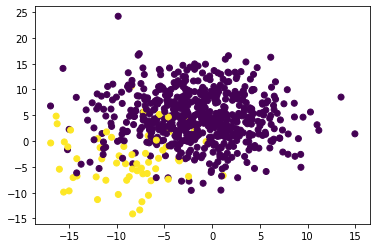

In [292]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter

X, y = make_blobs(n_samples=[600, 60], random_state=1, cluster_std=5)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [238]:
# Resample the training data with the RandomOversampler

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [239]:
#what is the "balance" or the mix between loans _status now
Counter(y_resampled)

Counter({'low_risk': 51366, 'high_risk': 51366})

In [294]:
# Train the Logistic Regression model using the resampled data

from sklearn.linear_model import LogisticRegression
#model
clf = LogisticRegression(solver='lbfgs', random_state=1)
#fit
clf.fit(X_resampled, y_resampled)

#predict using predict method
y_pred = clf.predict(X_test)

In [299]:
# Display the confusion matrix
# from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred)


In [300]:
# calculatee balanced accuracy score

balanced_accuracy_score(y_test, y_pred)

0.8325468421491353

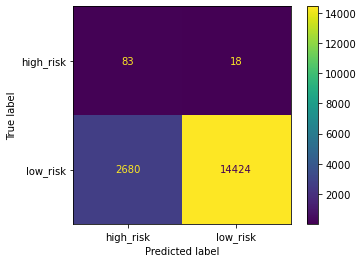

In [330]:
disp2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = clf.classes_)
disp2.plot()

plt.savefig("./images/RANDOMOVERSAMPLING_confusion_matrix.png")

In [331]:
# Print the imbalanced classification report
print("RandomOverSampler")
print(classification_report_imbalanced(y_test, y_pred))

RandomOverSampler
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.82      0.87      0.07      0.84      0.71       101
   low_risk       1.00      0.87      0.82      0.93      0.84      0.72     17104

avg / total       0.99      0.87      0.82      0.92      0.84      0.72     17205



### SMOTE Oversampling

In [304]:
from imblearn.over_sampling import SMOTE

# Resample the training data with SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(
   X_train, y_train)

In [305]:
Counter(y_resampled)

Counter({'low_risk': 51366, 'high_risk': 51366})

In [306]:
# Train the Logistic Regression model using the resampled data

#model 
clf = LogisticRegression(solver='lbfgs', random_state=1)

#train/fit
clf.fit(X_resampled, y_resampled)

#predict
y_pred = clf.predict(X_test)

In [312]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.8440938486973113

In [310]:
# Display the confusion matrix

cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[   83,    18],
       [ 2285, 14819]])

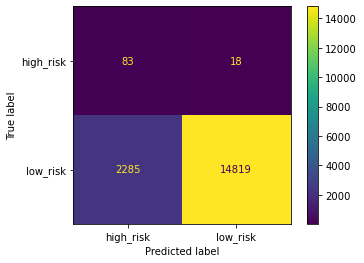

In [329]:
disp3 = ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = clf.classes_)
disp3.plot()

plt.savefig("./images/SMOTE_confusion_matrix.png")

In [332]:
# Print the imbalanced classification report
print("SMOTE Method")
print(classification_report_imbalanced(y_test, y_pred))

SMOTE Method
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.82      0.87      0.07      0.84      0.71       101
   low_risk       1.00      0.87      0.82      0.93      0.84      0.72     17104

avg / total       0.99      0.87      0.82      0.92      0.84      0.72     17205



# Undersampling

In this section, you will test an undersampling algorithms to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [316]:
# Resample the data using the ClusterCentroids resampler
from imblearn.under_sampling import ClusterCentroids

# Warning: This is a large dataset, and this step may take some time to complete
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

In [318]:
# Train the Logistic Regression model using the resampled data
clf = LogisticRegression(solver='lbfgs', random_state=1)
clf.fit(X_resampled, y_resampled)


LogisticRegression(random_state=1)

In [319]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

0.8440938486973113

In [321]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   83,    18],
       [ 2285, 14819]])

In [325]:
import matplotlib.pyplot as plt

In [328]:
disp3 = ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = clf.classes_)
disp3.plot()

In [328]:
#save the image
plt.savefig("./images/clustercentroids_confusion_matrix.png")

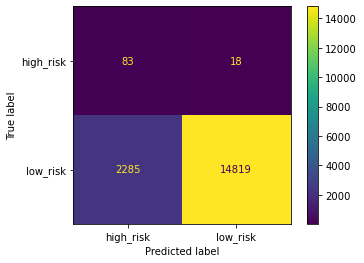

In [343]:
# Print the imbalanced classification report
print("Cluster Undersampling")
print(classification_report_imbalanced(y_test, y_pred))

Cluster Undersampling
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.82      0.87      0.07      0.84      0.71       101
   low_risk       1.00      0.87      0.82      0.93      0.84      0.72     17104

avg / total       0.99      0.87      0.82      0.92      0.84      0.72     17205



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [335]:
from imblearn.combine import SMOTEENN
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
smote_enn = SMOTEENN(random_state=0)

X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'low_risk': 51366, 'high_risk': 51366})

In [337]:
# Train the Logistic Regression model using the resampled datarain
from sklearn.linear_model import LogisticRegression
#MODEL
clf= LogisticRegression(solver='lbfgs', random_state=1)

#FIT
clf.fit(X_resampled, y_resampled)

#PREDICT
y_pred = clf.predict(X_test)

In [339]:
# Calculated the balanced accuracy score

balanced_accuracy_score(y_test, y_pred)

0.8440938486973113

In [340]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[   83,    18],
       [ 2285, 14819]])

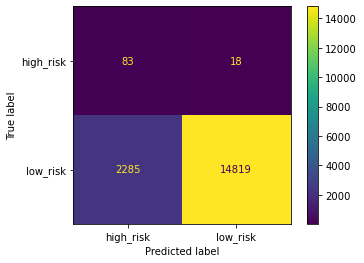

In [341]:
disp3 = ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = clf.classes_)
disp3.plot()

#save the image
plt.savefig("./images/SMOTHEEN_CONFUSION_matrix.png")


In [342]:
# Print the imbalanced classification report
print("SMOTHEEN")
print(classification_report_imbalanced(y_test, y_pred))

SMOTHEEN
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.04      0.82      0.87      0.07      0.84      0.71       101
   low_risk       1.00      0.87      0.82      0.93      0.84      0.72     17104

avg / total       0.99      0.87      0.82      0.92      0.84      0.72     17205

